In [1]:
import numpy as np 
from numpy import genfromtxt
from numpy import linalg as LA
import scipy
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
d = 100
beta = 0.1
m = 1
p = 50
#met_list = ['Nelder-Mead', 'Powell', 'BFGS', 'L-BFGS-B', 'SLSQP', 'CG', 'TNC', 'COBYLA', 'Brent', 'Golden']
met_list = ['Nelder-Mead', 'Powell', 'BFGS', 'L-BFGS-B', 'SLSQP', 'CG', 'TNC', 'Golden']
test_mets = np.zeros((len(met_list), 100))
test_times = np.zeros((len(met_list), 100))
test_minima = np.zeros((len(met_list), 100))
index = 0
for met in met_list:
    df2 = pd.read_csv('quad_sd_minimize_met_%s_beta_%s_m=%s_d=%s_p=%s_All.csv' % (met, beta, m, d, p))
    df1 = pd.read_csv('quad_testing_minimize_met_%s_beta_%s_m=%s_d=%s_p=%s_All.csv' % (met, beta, m, d, p))
    test_mets[index, :] = np.array(df2['number_minimas_per_func_multistart'])
    test_times[index, :] = np.array(df2['time_multistart'])
    assert(np.all(np.array(df2['number_minimas_per_func_metod']) == np.array(df1['number_minimas_per_func_metod'])))
    test_minima[index, :] = np.array(df1['number_minimas_per_func_metod'])
    index += 1

In [9]:
np.array(df2['number_minimas_per_func_metod'])

array([11., 10., 10., 11., 12., 11., 13., 13., 12., 11.,  9.,  9., 12.,
        9., 12., 11., 12., 10., 10.,  7., 12., 12.,  9., 10., 10., 11.,
        7.,  8.,  7.,  9., 10., 11., 11.,  7., 11.,  9.,  8., 11., 12.,
       11., 10.,  9., 10., 11., 10., 11., 10., 10., 11., 13., 10.,  8.,
       12.,  9.,  9., 10., 10., 12., 12., 15., 10.,  9., 10.,  7., 13.,
       11.,  9., 12.,  9., 10., 10.,  8.,  7.,  9.,  9., 10., 10., 13.,
       10., 10., 11.,  9., 13., 11.,  8.,  9., 13., 12., 12., 10.,  9.,
       11., 11., 10.,  9., 10., 10.,  9., 10., 10.])

In [10]:
np.array(df1['number_minimas_per_func_metod'])

array([11., 10., 10., 11., 12., 11., 13., 13., 12., 11.,  9.,  9., 12.,
        9., 12., 11., 12., 10., 10.,  7., 12., 12.,  9., 10., 10., 11.,
        7.,  8.,  7.,  9., 10., 11., 11.,  7., 11.,  9.,  8., 11., 12.,
       11., 10.,  9., 10., 11., 10., 11., 10., 10., 11., 13., 10.,  8.,
       12.,  9.,  9., 10., 10., 12., 12., 15., 10.,  9., 10.,  7., 13.,
       11.,  9., 12.,  9., 10., 10.,  8.,  7.,  9.,  9., 10., 10., 13.,
       10., 10., 11.,  9., 13., 11.,  8.,  9., 13., 12., 12., 10.,  9.,
       11., 11., 10.,  9., 10., 10.,  9., 10., 10.])

In [13]:
t = 0
for j in range(len(met_list)):
    for i in range(j, len(met_list)):
        test_1 = test_mets[j]
        test_2 = test_mets[i]
        test_min_1 = test_minima[j] 
        test_min_2 = test_minima[i] 
        assert(test_1.shape[0] == 100)
        assert(test_2.shape[0] == 100)
        assert(np.all(test_1 == test_2))
        if np.all(test_min_1 == test_min_2) == False:
            t += 1

In [23]:
def box_plots_time(times, met_list, d, p):
    plt.figure(figsize=(15, 5))
    plt.boxplot(times)
    xlabels = met_list
    plt.xticks(np.arange(1, len(met_list) + 1), xlabels, size=12)
    plt.yticks(size=12)
    plt.ylabel(r'Time (s)', size=12)

    plt.savefig('time_quad_d_%s_p_%s.pdf' %
                (d, p), bbox_inches="tight")
    plt.show()

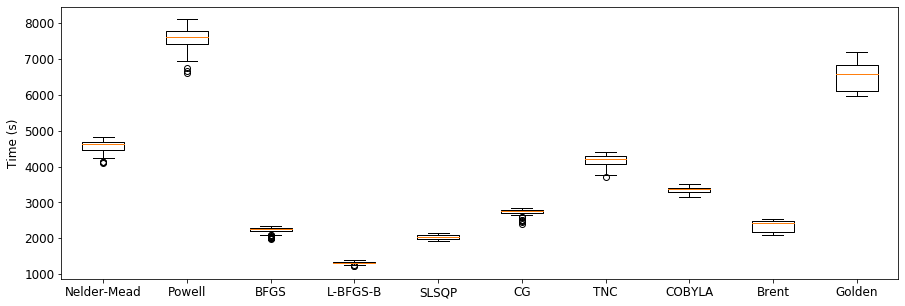

In [24]:
box_plots_time(test_times.T, met_list, d, p)